# EDA

## Exploring the Target

In [1]:
import pandas as pd
import seaborn as sns

insurance = pd.read_csv('Data/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


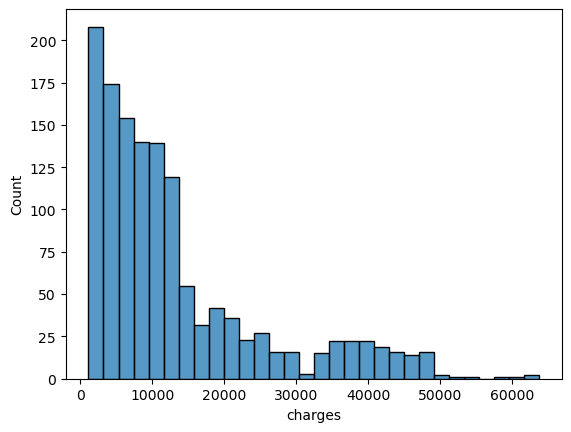

In [12]:
sns.histplot(insurance['charges']);

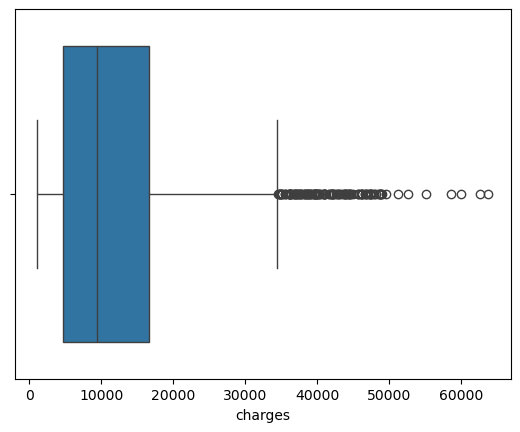

In [9]:
sns.boxplot(x=insurance['charges']);

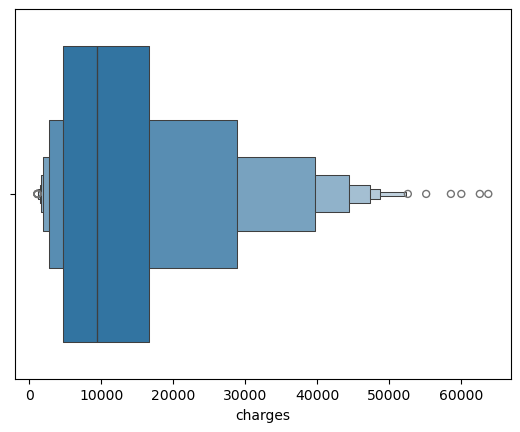

In [11]:
sns.boxenplot(x=insurance['charges']);

## Exploring Features

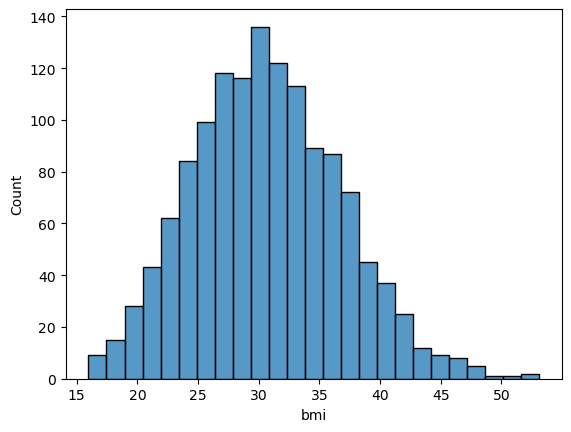

In [22]:
sns.histplot(x=insurance['bmi']);

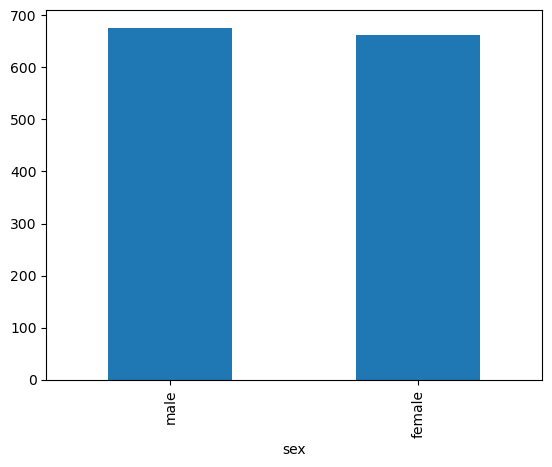

In [27]:
insurance['sex'].value_counts().plot.bar();

## Linear Relationships & Correlations

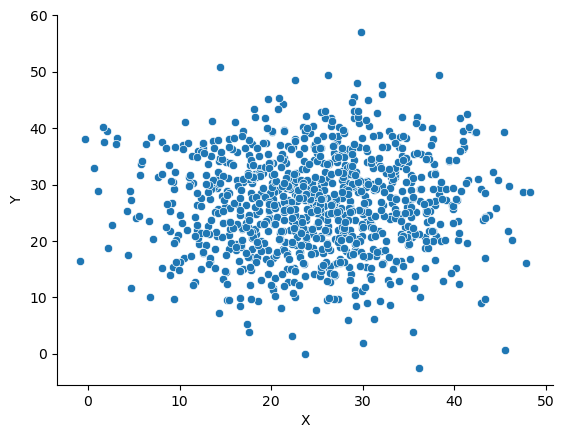

In [32]:
import numpy as np
import seaborn as sns

xx = np.array([-0.51, 51.2])
yy = np.array([0.33, 51.6])
means = [xx.mean(), yy.mean()]
stds = [xx.std()/3, yy.std()/3]
corr = 0 # correlation: changing it makes it more linear. 1 is perfectly positive correlation, -1 is negative correelation and 0 is no correlation
covs = [
    [stds[0]**2, stds[0]*stds[1]*corr],
    [stds[0]*stds[1]*corr, stds[1]**2]
]

m = np.random.multivariate_normal(means, covs, 1000).T

import pandas as pd

df = pd.DataFrame(m).T
df.columns = ['X', 'Y']
df.head()

sns.scatterplot(df, x='X', y='Y')

sns.despine()

In [33]:
# Linear Relationships using our diamonds data

In [35]:
insurance[['charges', 'age']].corr()

,charges,age
charges,1.000000,0.299008
age,0.299008,1.000000


In [37]:
insurance.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

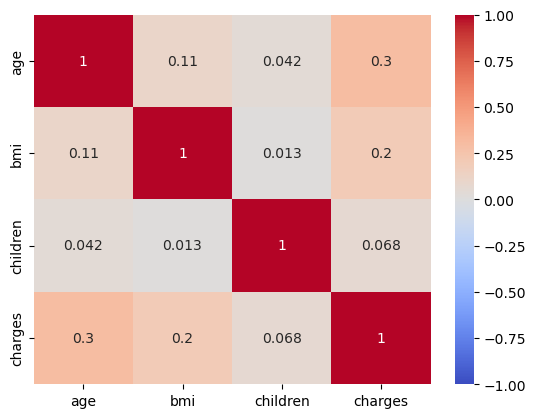

In [40]:
sns.heatmap(insurance.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

## Feature-Target Relationships

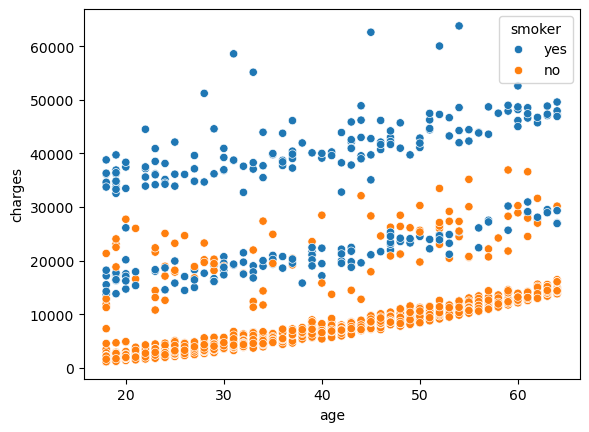

In [42]:
sns.scatterplot(insurance, x='age', y='charges', hue='smoker');

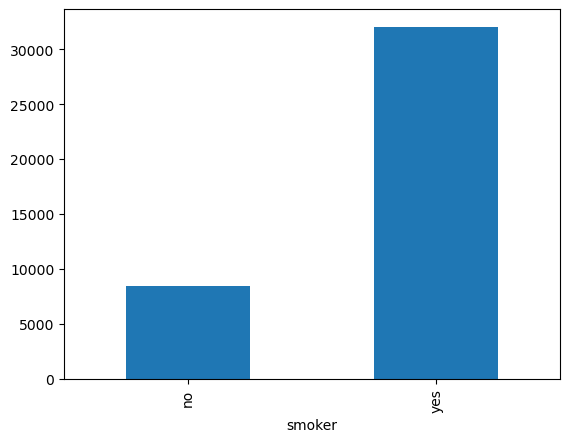

In [47]:
insurance.groupby('smoker')['charges'].mean().plot.bar();

## Feature-Feature Relationships

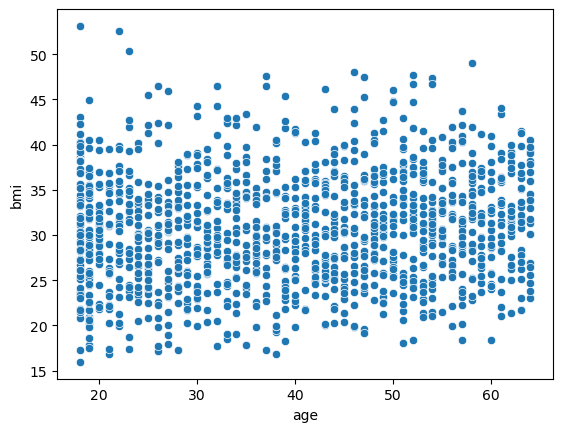

In [49]:
sns.scatterplot(insurance, x='age', y='bmi'); # not strong relationship

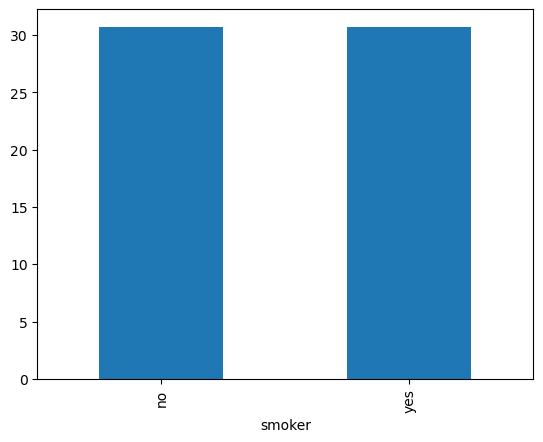

In [51]:
insurance.groupby('smoker')['bmi'].mean().plot.bar();

## PRO TIP: Pairplots & Lmplots

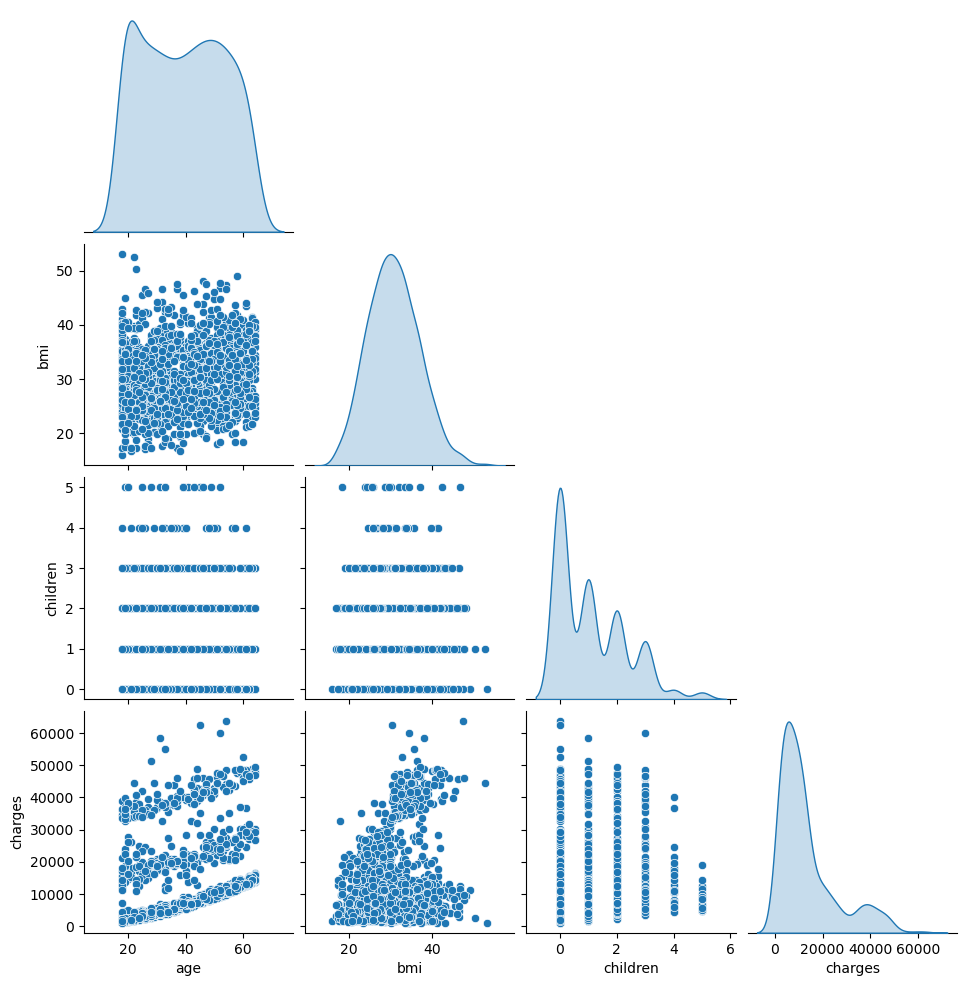

In [55]:
sns.pairplot(insurance, corner=True, diag_kind='kde');

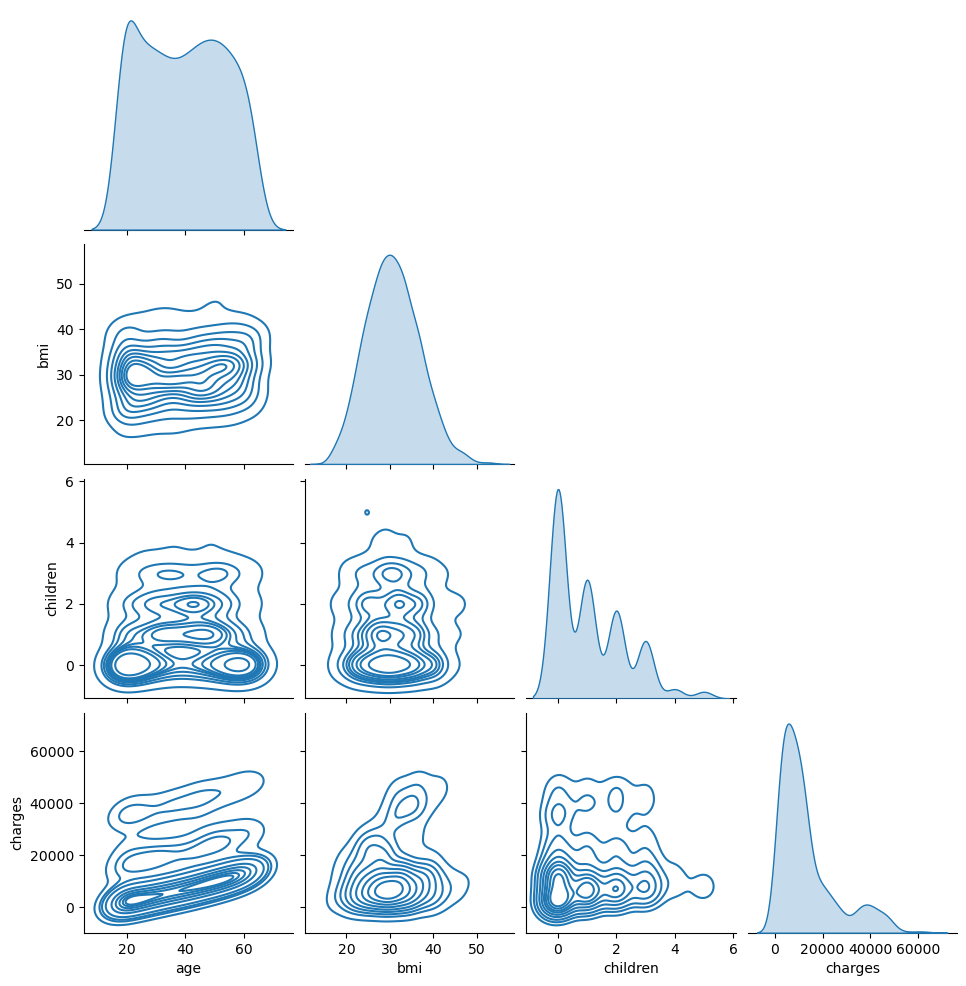

In [56]:
sns.pairplot(insurance, corner=True, kind='kde');

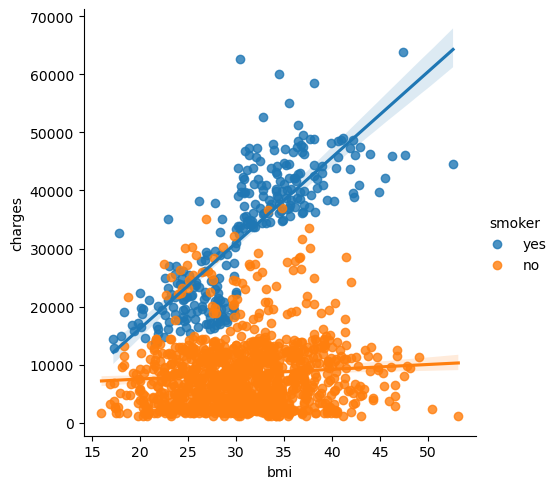

In [58]:
sns. b(insurance, x='bmi', y='charges', hue='smoker');